In [2]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
#15.85828652, 80.78694696
#15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-04-18')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B02_10m", "B03_10m","B11_20m","B12_20m","B08_10m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 3, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 ... 2023-04...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 1609 1571 1573 1567 ... 1704 1602 1531 1646
    B02_10m      (time, y, x) uint16 1468 1495 1473 1470 ... 1650 1588 1566 1806
    B03_10m      (time, y, x) uint16 2022 1978 1971 1972 ... 1971 1868 1793 1980
    B11_20m      (time, y, x) uint16 2530 2521 2499 2485 ... 1172 1149 1144 1221
    B12_20m      (time, y, x) uint16 1666 1668 1656 1637 ... 1154 1125 1130 1185
    B08_10m      (time, y, x) uint16 4510 4596 4372 4512 ... 1273 1194 1133 1304
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


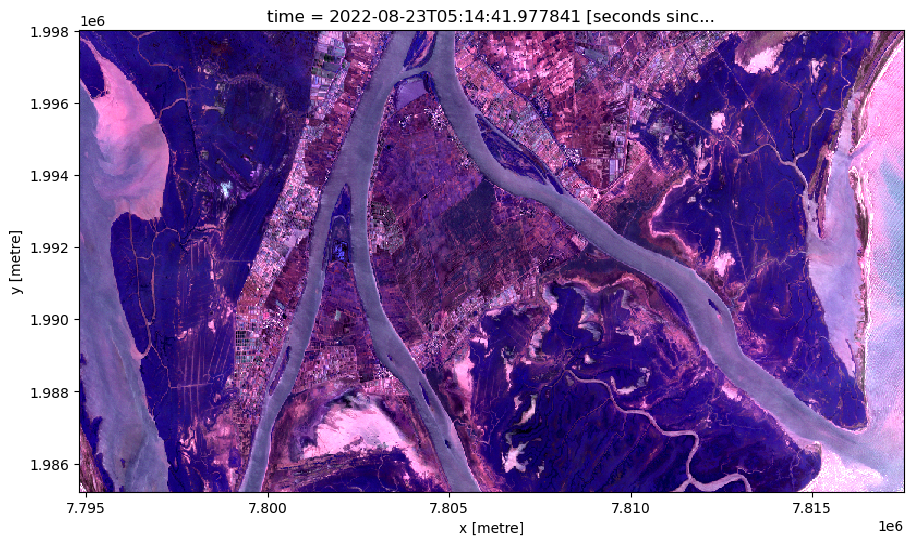

In [3]:
dataset = ds

rgb(ds, bands=[ "B04_10m","B02_10m", "B03_10m"], index=[0])

In [4]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B03_10m - dataset.B11_20m
band_sum = dataset.B03_10m + dataset.B11_20m

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print("--------    ",ndvi)

--------     <xarray.DataArray (time: 3, y: 427, x: 757)>
array([[[-0.1115993 , -0.12069349, -0.1181208 , ..., -0.16645162,
         -0.1046977 , -0.12354755],
        [-0.10772676, -0.10078917, -0.12528166, ..., -0.11484245,
         -0.12248394, -0.05994119],
        [-0.08639706, -0.0790394 , -0.09633341, ..., -0.10934041,
         -0.10912511, -0.05943152],
        ...,
        [ 0.23478729,  0.22875452,  0.21177432, ...,  0.23809524,
          0.24400291,  0.24252652],
        [ 0.2250605 ,  0.24106176,  0.18991692, ...,  0.2443778 ,
          0.21530612,  0.25658807],
        [ 0.22178374,  0.234996  ,  0.2286036 , ...,  0.24943708,
          0.3168938 ,  0.23237725]],

       [[-0.12419594, -0.12780829, -0.13127217, ..., -0.21438396,
         -0.17916666, -0.22568733],
        [-0.11500493, -0.11602484, -0.12613982, ..., -0.19168416,
         -0.1727787 , -0.15028664],
        [-0.10339385, -0.08007351, -0.09369505, ..., -0.14551891,
         -0.17029133, -0.11394713],
...
     

<Figure size 800x800 with 0 Axes>

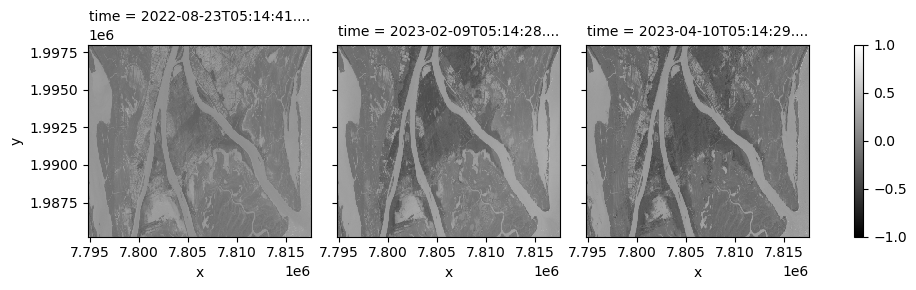

In [10]:
plt.figure(figsize=(8, 8))
ndvi.plot(col = "time", cmap="binary_r", vmin=-1, vmax=1, col_wrap=3)
plt.show()